In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN, Dense, Activation

In [3]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None, # most used words
                                                      skip_top=0, # ignore high frequency word
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

Using TensorFlow backend.


In [4]:
print(type(x_train), x_train.shape)

<class 'numpy.ndarray'> (25000,)


In [5]:
print(x_test.shape)

(25000,)


In [6]:
unique, counts = np.unique(y_test, return_counts = True)
print(" Y Distribution:", dict(zip(unique,counts)))

 Y Distribution: {0: 12500, 1: 12500}


Text(0.5, 1.0, 'Y test')

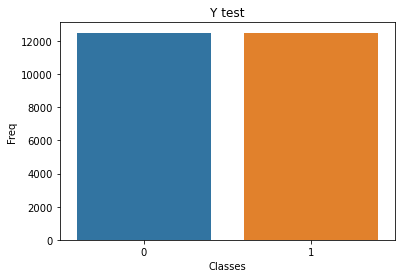

In [7]:

plt.figure()
sns.countplot(y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")

Text(0.5, 1.0, 'Y train')

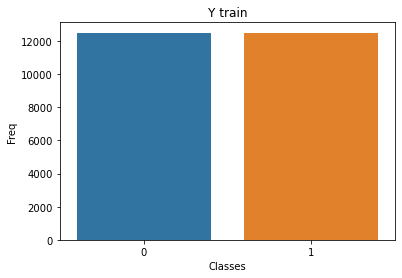

In [8]:
plt.figure()
sns.countplot(y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")

In [9]:
d = x_train[0]
len(d)

218

In [10]:
review_len_train = [len(i) for i in x_train]
review_len_test = [len(i) for i in x_test]

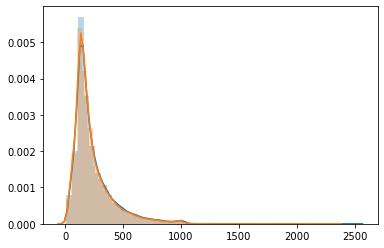

In [11]:
sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
sns.distplot(review_len_test, hist_kws = {"alpha":0.3})

In [12]:
np.median(review_len_train)

178.0

In [13]:
np.median(review_len_test)

174.0

In [14]:
word_index = imdb.get_word_index()
type(word_index)

dict

In [15]:
def read_review(index):
    word_id_dict = dict([(value, key) for key, value in word_index.items()]) 
    decode_review = " ".join([word_id_dict.get(i-3, "!") for i in x_train[index]]) # index start from 3
    print(decode_review)
    print(y_train[index])
    return decode_review

decoded_review = read_review(36)

! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


In [16]:
num_words = 15000 # unique word count
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

max_len = 130
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test , maxlen = max_len)
print(x_train[3])

[    2    17    29   456     4    65     7    27   205   113    10    10
     2     4     2 10359     9   242     4    91  1202 11377     5  2070
   307    22     7  5168   126    93    40     2    13   188  1076  3222
    19     4 13465     7  2348   537    23    53   537    21    82    40
     2    13     2    14   280    13   219     4     2   431   758   859
     4   953  1052 12283     7  5991     5    94    40    25   238    60
     2     4     2   804     2     7     4  9941   132     8    67     6
    22    15     9   283     8  5168    14    31     9   242   955    48
    25   279     2    23    12  1685   195    25   238    60   796 13713
     4   671     7  2804     5     4   559   154   888     7   726    50
    26    49  7008    15   566    30   579    21    64  2574]


In [17]:
for i in range(4):
    print(len(x_train[i]))

130
130
130
130


In [18]:
read_review(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


"! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br"

In [19]:
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(x_train[0])))
rnn.add(SimpleRNN(16, input_shape=(num_words,max_len), return_sequences= False, activation= "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
rnn.compile(loss= "binary_crossentropy", optimizer="rmsprop",metrics=["accuracy"])

In [ ]:
history = rnn.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=5,batch_size=128,verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5


In [ ]:
score = rnn.evaluate(x_test, y_test)
print("Accuracy %", score[1]*100)

plt.figure
plt.plot(history.hidtory["acc"], label = Train)
plt.plot(history.hidtory["val_acc"], label = Test)
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()